# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import packages 
!pip install tweepy
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
 # directly download the weratedogs twitter archive data
data_1=pd.read_csv("twitter-archive-enhanced.csv")
data_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,pupper,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None
1439,696894894812565505,NaN,NaN,2016-02-09 03:14:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696894894...,9,10,None,None,None,None,None
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)
soup=BeautifulSoup(response.content,'lxml')
image=pd.read_csv("image-predictions.tsv",sep='\t')
image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True
214,670046952931721218,https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg,1,Blenheim_spaniel,0.998335,True,beagle,0.000647,True,Brittany_spaniel,0.000392,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#create an API object used to gather Twitter data.
# get the keys from the twitter
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'
# define the oAuthHandler 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



tweet_ids = data_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

the code above gives all the tweet_id as fails

In [6]:
url= 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response=requests.get(url)
with open('tweet_json.txt',mode='wb')as file:
    file.write(response.content)
soup=BeautifulSoup(response.content,'lxml')
tweet=pd.read_json("tweet_json.txt",lines=True)
tweet.drop(['full_text','created_at','id_str','truncated','display_text_range','entities','extended_entities','source','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','place','contributors','is_quote_status','favorited','possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','retweeted'],axis=1,inplace=True)
tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#assess twitter-archive-enhanced dataset
data_1.info()
data_1.describe()
data_1.duplicated().sum()
data_1.isnull().sum()
data_1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [48]:
data_1.shape

(2356, 17)

1.seems the maximum and minimum values of the rating_numerator and rating_denominator are inaccurate and ambiguous 
2. there is no duplicates
3. there seems to be missing values in the dataset however the columns involved are irrelevant to the study
4. the datatypes of ratings are int should be changed to float

In [8]:
# assess the image-prediction dataset
image.info()
image.dtypes
image.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


1.there is missing data out of 2356 only 2075 are available

In [14]:
# assess the tweet_json.txt data
tweet.info()
tweet.dtypes
tweet.duplicated().sum()
tweet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


1.missing values out of the 2356 there is only 2354

2.inconsistent id name (change to tweet_id )to allow merge



# Quality issues
1.retweets ratings . the analysis only requiers original ratings

2.wrong dog names

3.inconsistent rating denominator

4.innacurate rating numerator

5.change int data types in the twitter-archive-enhanced.csv data set to float

6.missing values in the image-prediction dataset

7.wrong dog stage format

8.missing columns for prediction of the 4th image in image-prediction dataset For p4

# Tidiness issues
1.doggo,pupper,puppo and floofer form one variable called stage

2.inconsistent column names( tweet_id and id) it requires changing when merging the datasets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
data_clean=data_1.copy()
image_clean=image.copy()
tweet_clean=tweet.copy()

# issues1: retweet ratings 
    the study requires original tweets

In [18]:
data_clean.retweeted_status_id.value_counts().sum()

181

# define
drop rows where the retweets status id is present

# code

In [36]:
print(data_clean[data_clean['retweeted_status_id'] > 0].index.values)

[  19   32   36   68   73   74   78   91   95   97  101  109  118  124
  130  132  137  146  155  159  160  165  171  180  182  185  194  195
  204  211  212  222  230  231  247  250  260  266  272  273  281  285
  286  289  298  302  303  307  309  310  319  327  332  340  341  343
  357  359  366  382  386  397  399  406  411  415  420  422  425  431
  434  435  438  446  447  450  453  455  462  465  469  475  476  479
  485  488  506  522  530  535  538  541  543  546  552  555  558  561
  566  568  574  577  581  583  586  589  594  595  596  597  598  599
  600  601  602  603  604  605  606  612  615  618  627  629  634  654
  655  656  661  664  669  671  677  682  686  692  694  702  720  728
  741  742  745  749  753  759  764  767  770  773  778  784  794  800
  811  815  818  822  826  829  833  841  847  860  868  872  885  890
  895  908  911  926  937  943  949 1012 1023 1043 1242 2259 2260]


In [43]:
data_clean.drop(data_clean[data_clean['retweeted_status_id'] > 0].index, inplace=True)


# test

In [44]:
data_clean.retweeted_status_id.value_counts().sum()

0

In [47]:
data_clean.shape

(2175, 17)

# Issue #1: missing data 

# Define:
delete irrelevant columns from the data_1 dataset then merge it with the tweet data and the image then fill the missing values with the mean 
the id column in the tweet_json.txt dataset has to be renamed to tweet_id

# Code

In [49]:
# delete irrelevant columns
data_clean.drop(['text','timestamp','source','expanded_urls','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id'], axis=1, inplace=True)
# first change id to tweet _id
tweet_clean.rename(columns={"id":"tweet_id"},inplace=True)
# merge data_clean  and tweet_clean
full_data=pd.merge(data_clean,tweet_clean,how='inner')
                   

# Test

In [50]:
full_data.isnull().sum()

tweet_id              0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count         0
favorite_count        0
dtype: int64

# assess the full _data

In [51]:
full_data.info()
full_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   rating_numerator    2175 non-null   int64 
 2   rating_denominator  2175 non-null   int64 
 3   name                2175 non-null   object
 4   doggo               2175 non-null   object
 5   floofer             2175 non-null   object
 6   pupper              2175 non-null   object
 7   puppo               2175 non-null   object
 8   retweet_count       2175 non-null   int64 
 9   favorite_count      2175 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 186.9+ KB


tweet_id              0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count         0
favorite_count        0
dtype: int64

the data above shows innacuracy and inconsistent data of the ratings, the maximum and the minimum values are not correct
the minimum value of the retweet and favourite count is innacurate

In [52]:
# merge all data sets to form full dataset
full = pd.merge(full_data, image_clean, on=['tweet_id'], how='inner')
full.info
full.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [53]:
full

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,None,None,None,None,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,13,10,Tilly,None,None,None,None,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,12,10,Archie,None,None,None,None,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,13,10,Darla,None,None,None,None,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,12,10,Franklin,None,None,None,None,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,5,10,None,None,None,None,None,41,111,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1990,666044226329800704,6,10,a,None,None,None,None,147,311,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1991,666033412701032449,9,10,a,None,None,None,None,47,128,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1992,666029285002620928,7,10,a,None,None,None,None,48,132,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Issue #2: innacurate dog names 

#### Define
replace the names indicated as "a" and'an'to None

#### Code

In [54]:
full["name"].replace("a", "None", inplace=True)

In [55]:
full["name"].replace("an", "None", inplace=True)

#### Test

In [56]:
full.name.value_counts()

None       607
Charlie     11
Oliver      10
Lucy        10
Cooper      10
          ... 
Wiggles      1
Dylan        1
Leela        1
Sweet        1
Frönq        1
Name: name, Length: 934, dtype: int64

# Issue 3 inaccurate rating numerator (outliers)

# Define
change the values 420,666,182,0,165,1776,204,143,121,144 to the median


# code

<AxesSubplot:xlabel='rating_numerator'>

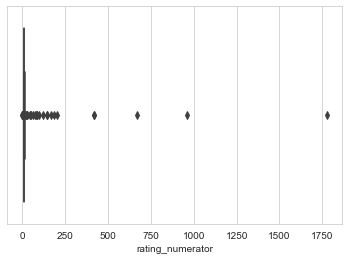

In [57]:
#check for outliers
sns.set_style("whitegrid")
sns.boxplot(x=full_data['rating_numerator'])


although the numerator having a higher number than denominator is not an issue

the some values seeems to be ambiguous 

the values should be replaced with the median

# TEST

In [58]:
full.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


# Issue 4 : inaaccurate rating_denominator

# code

In [59]:
for x in full.index:
  if full.loc[x, "rating_denominator"] != 10:
    full.loc[x, "rating_denominator"] = 10

# test

In [60]:
full.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.0,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,0.0,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,10.0,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.0,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.0,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.0,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


# issue 8 missing column for the image prediction data

# define
Create a new column called breed  in the image data to show the breed of the dog  and pass the 4th image as none
 drop the other columns 

# code

In [61]:
full.loc[full['img_num']==1,'breed'] = full['p1']
full.loc[full['img_num']==2,'breed'] = full['p2']
full.loc[full['img_num']==3,'breed'] = full['p3']
full.loc[full['img_num']==4,'breed'] = 'None'
#view the added column
full.breed.value_counts()

golden_retriever      113
Labrador_retriever    102
Pembroke               80
Chihuahua              72
pug                    49
                     ... 
grey_fox                1
mud_turtle              1
carton                  1
lawn_mower              1
park_bench              1
Name: breed, Length: 372, dtype: int64

In [62]:
# drop irrelevant columns
full.drop(['img_num','p1','p1_conf','p2','p2_conf','p3','p3_conf','p1_dog','p2_dog','p3_dog','jpg_url'],axis=1,inplace=True)

# test

In [63]:
full.sample(100)


,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,breed
216,838921590096166913,13,10,Arlo,None,None,None,None,2357,12183,Border_terrier
1028,706310011488698368,12,10,None,None,None,pupper,None,9034,23443,Pembroke
1400,679511351870550016,7,10,William,None,None,None,None,1461,3711,Chihuahua
1794,669682095984410625,9,10,Louie,None,None,None,None,146,375,Christmas_stocking
654,759447681597108224,11,10,Oakley,None,None,None,None,2827,9418,kuvasz
...,...,...,...,...,...,...,...,...,...,...,...
1610,673345638550134785,7,10,Gerald,None,None,None,None,1422,2700,hamster
522,783334639985389568,12,10,Dave,None,None,None,None,13616,32651,Shetland_sheepdog
1419,678675843183484930,2,10,None,None,None,None,None,1680,3155,maze
430,800141422401830912,13,10,Peaches,None,None,None,None,2980,17092,Labrador_retriever


the columns doggo,floofer,pupper and puppo could form one column as dog stages

In [64]:
# view the full data
full

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,breed
0,892420643555336193,13,10,Phineas,None,None,None,None,8853,39467,orange
1,892177421306343426,13,10,Tilly,None,None,None,None,6514,33819,Chihuahua
2,891815181378084864,12,10,Archie,None,None,None,None,4328,25461,Chihuahua
3,891689557279858688,13,10,Darla,None,None,None,None,8964,42908,paper_towel
4,891327558926688256,12,10,Franklin,None,None,None,None,9774,41048,English_springer
...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,5,10,None,None,None,None,None,41,111,miniature_pinscher
1990,666044226329800704,6,10,None,None,None,None,None,147,311,Rhodesian_ridgeback
1991,666033412701032449,9,10,None,None,None,None,None,47,128,German_shepherd
1992,666029285002620928,7,10,None,None,None,None,None,48,132,redbone


# issue 5 wrong format of dogstage

# define
create a column called stage and of the value

# code

In [65]:
full.loc[full['doggo']=='doggo','stage'] = full['doggo']
full.loc[full['floofer']=='floofer','stage'] = full['floofer']
full.loc[full['pupper']=='pupper','stage'] = full['pupper']
full.loc[full['puppo']=='puppo','stage'] = full['puppo']


In [66]:
#drop the columns
full.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)


# test

In [67]:
 # check for the dog stage column
full.sample(10)

,tweet_id,rating_numerator,rating_denominator,name,retweet_count,favorite_count,breed,stage
1241,688211956440801280,13,10,Derby,937,2426,bannister,NaN
839,733482008106668032,10,10,None,1065,3438,French_bulldog,NaN
724,750011400160841729,11,10,Piper,1035,3568,muzzle,doggo
1373,680497766108381184,12,10,Percy,2162,4639,Chihuahua,NaN
44,882627270321602560,13,10,Stanley,6342,28382,Pembroke,NaN
1852,668620235289837568,10,10,Kallie,45,211,crash_helmet,NaN
1196,691321916024623104,11,10,Molly,747,2828,Rottweiler,NaN
505,786595970293370880,11,10,Dale,3601,10497,Pembroke,NaN
1229,689154315265683456,9,10,None,1128,3348,cocker_spaniel,NaN
900,720059472081784833,9,10,Charleson,1268,4229,Mexican_hairless,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
full.to_csv("twitter_archive_master.csv",index=False)


In [88]:
data.shape

(1994, 8)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [80]:
data=pd.read_csv("twitter_archive_master.csv")
data.describe()
data.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [70]:
data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.0,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.0,2766.753260,8895.725677
std,6.747816e+16,41.497718,0.0,4674.698447,12213.193181
min,6.660209e+17,0.000000,10.0,16.000000,81.000000
25%,6.758475e+17,10.000000,10.0,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.0,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.0,3220.000000,11308.000000
max,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000


In [71]:
datah=data.iloc[:,np.r_[1,4,5,6]]
datah.groupby(['favorite_count'], axis=0, as_index=True).sum()
datah.min()

rating_numerator               0
retweet_count                 16
favorite_count                81
breed               Afghan_hound
dtype: object

In [81]:
d=data.iloc[:,np.r_[1,6]]
d.query('rating_numerator < 3')

,rating_numerator,breed
235,0,Staffordshire_bullterrier
756,0,traffic_light
1419,2,maze
1422,2,Maltese_dog
1519,1,paper_towel
1566,2,slug
1723,2,scorpion
1735,1,lacewing
1878,2,Angora
1887,2,seat_belt


### Insights:
1.majority of the dogs are rated between 10/10 to 15/10

2.breed with the lowest retweet and favorite count is afghan_hound 

3.the ratings_numerator lessthan 3 seems to be not dogs 
which implies the algorithm for predicting the breed of the dog is not efficient

### Visualization

In [73]:
data['range_numerator'] = pd.cut(data.rating_numerator, [0,5,10,15,20,25,30,40,50], right=False)


In [74]:
data.breed.value_counts()

golden_retriever      113
Labrador_retriever    102
Pembroke               80
Chihuahua              72
pug                    49
                     ... 
grey_fox                1
mud_turtle              1
carton                  1
lawn_mower              1
park_bench              1
Name: breed, Length: 372, dtype: int64

Text(0, 0.5, 'retweet_count')

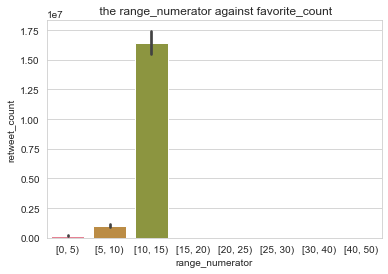

In [75]:
sns.barplot(x="range_numerator", y="favorite_count", data=data,estimator=sum, palette="husl")
plt.title(" the range_numerator against favorite_count")
plt.xlabel("range_numerator")
plt.ylabel("retweet_count")

a majority of the ratings are in the range of 10 to 15 and also received very high retweets as well as the lower atings receive low retweets

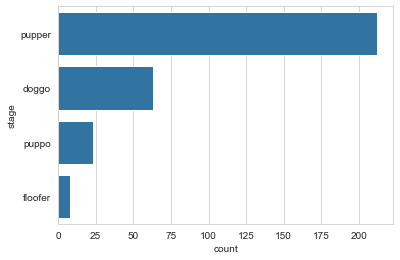

In [87]:
# Plot the breed on a Horizontal bar chart
base_color=sns.color_palette()[0]
breed_order = data['stage'].value_counts().index
sns.countplot(data=data, y='stage', color=base_color, order=breed_order);